<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 8. Sea level
## Length of day
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we load and display a **length-of-day** (LOD) dataset from the
[**International Earth Rotation Service**](	www.iers.org) (IERS), using `python`.

We first initialize the `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Length of day

In [2]:
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/LOD.dat'
year=np.loadtxt(fname=infile1,skiprows=2,usecols=0)
lod=np.loadtxt(fname=infile1,skiprows=2,usecols=1)
print (type(year),year.shape)
print (type(lod),lod.shape)

<class 'numpy.ndarray'> (21315,)
<class 'numpy.ndarray'> (21315,)


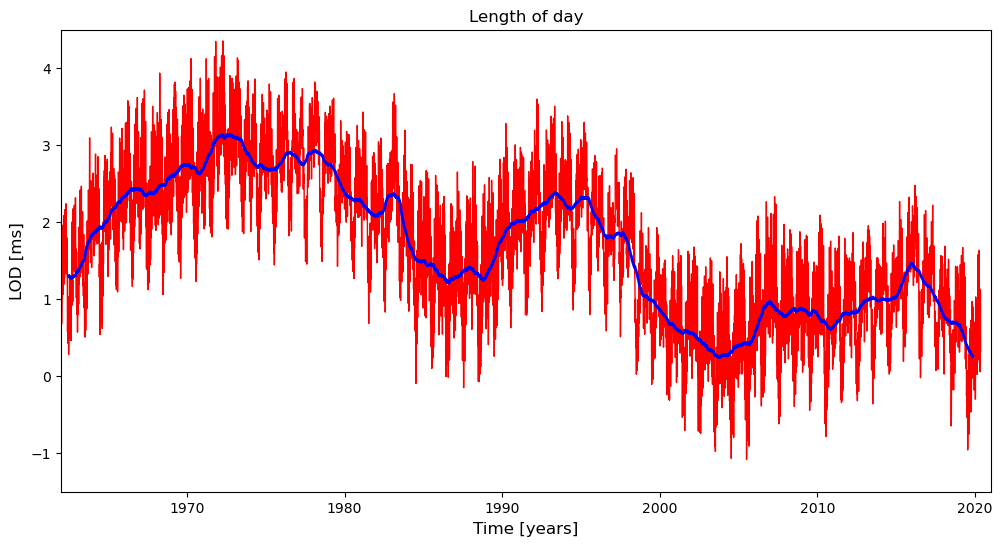

In [3]:
#-----------------------------------------------------------------------
# define function to plot 
#-----------------------------------------------------------------------
def plot_LOD(minmax,average=1):
    min = minmax[0]
    max = minmax[1]
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time [years]',size=12)
    plt.ylabel('LOD [ms]',size=12)
    plt.title('Length of day',size=12)
    yearsum = np.zeros(len(year)-average)
    lodsum = np.zeros(len(lod)-average)
    #print(yearsum.shape)
    for i in range(len(lod[:])-average):
        yearsum[i] = sum(year[i:i+average]) / float(average)
        lodsum[i] = sum(lod[i:i+average]) / float(average)
    plt.plot(year,lod,color='red',linestyle='-',linewidth=1)
    plt.plot(yearsum,lodsum,color='blue',linestyle='-',linewidth=2)
    plt.xlim([min,max])
    plt.ylim([-1.5,4.5])
    plt.show(10)
    
plot_LOD([1962,2021],365)

In [4]:
w = dict(minmax=widgets.IntRangeSlider(min=1962,max=2021,step=1,value=[1962,2021],continuous_update=False,description='years'),
         average=widgets.IntSlider(min=1,max=500,step=1,value=365,continuous_update=False,description='average'))
output = widgets.interactive_output(plot_LOD, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)